# Explore here

In [79]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#descargar data a csv 
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
pd.read_csv(url).to_csv('../data/raw/AB_NYC_2019.csv', index=False)

In [81]:
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")


In [82]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [84]:
#Eliminar duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [85]:
df = df[df['price'] > 0]
print((df["price"] == 0).sum())  


0


In [86]:
# Eliminar columnas que no se van a usar
columnas_a_eliminar = ["name", "host_name", "last_review", "id", "reviews_per_month"]
df.drop(columnas_a_eliminar, axis=1, inplace=True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [87]:
print(df.columns)


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


#### Caracteristicas iniciales
-Existen un total de 48895 filas y 15 columnas, donde el objetivo a predecir es el precio. 

-Se eliminan columnas como "name", "host_name", "last_review", "id", "reviews_per_month" ya que ademas de poseer valores nulos, no son datos relevantes para nuestro estudio.


In [88]:
groups = df['neighbourhood_group'].value_counts()
print(groups)

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64


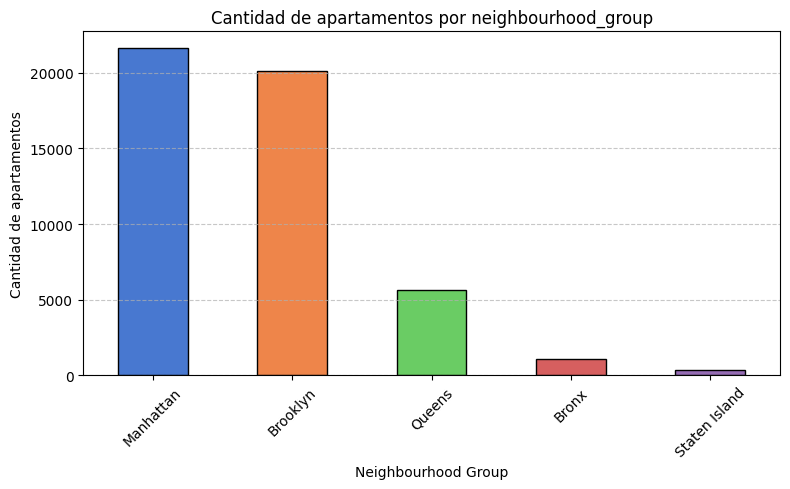

In [89]:
#Oferta de Apartamentos por Barrio
conteo = df['neighbourhood_group'].value_counts()

plt.figure(figsize=(8, 5))
colors = sns.color_palette("muted")
conteo.plot(kind='bar', color=colors, edgecolor='black')

# Personalizar el gráfico
plt.title('Cantidad de apartamentos por neighbourhood_group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Cantidad de apartamentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64


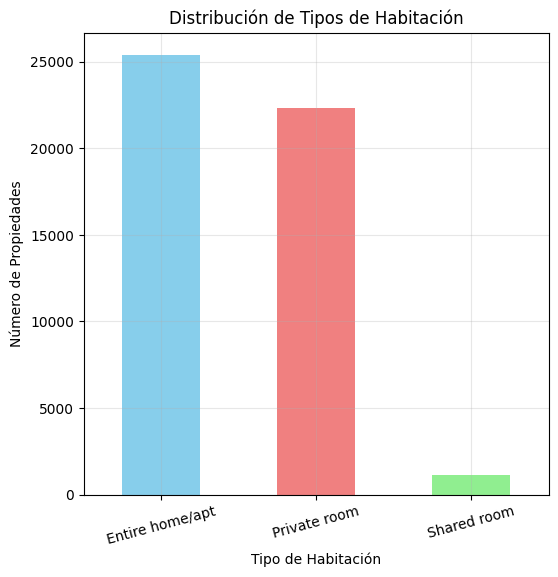

In [90]:
#TIPOS DE HABITACIÓN
tipos_habitacion=df['room_type'].value_counts()
print(tipos_habitacion)
plt.figure(figsize=(6,6))
tipos_habitacion.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Tipos de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 1.0, 'Ubicaciones de propiedades por barrios')

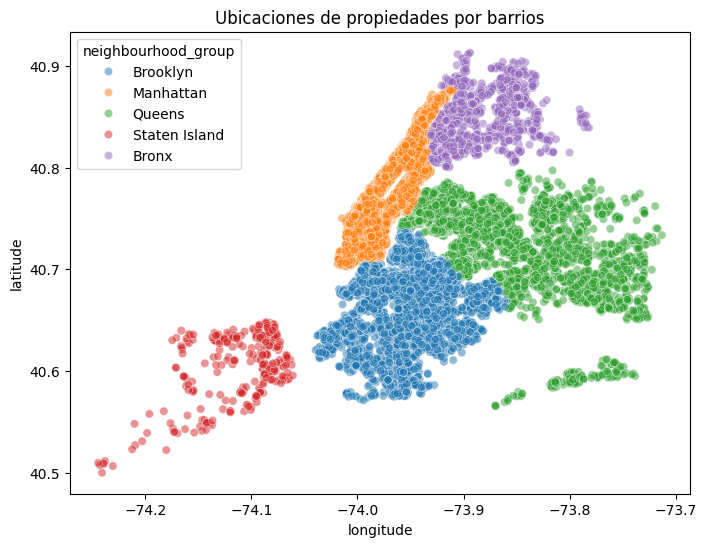

In [91]:
#Mapa de ofertas
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Ubicaciones de propiedades por barrios')

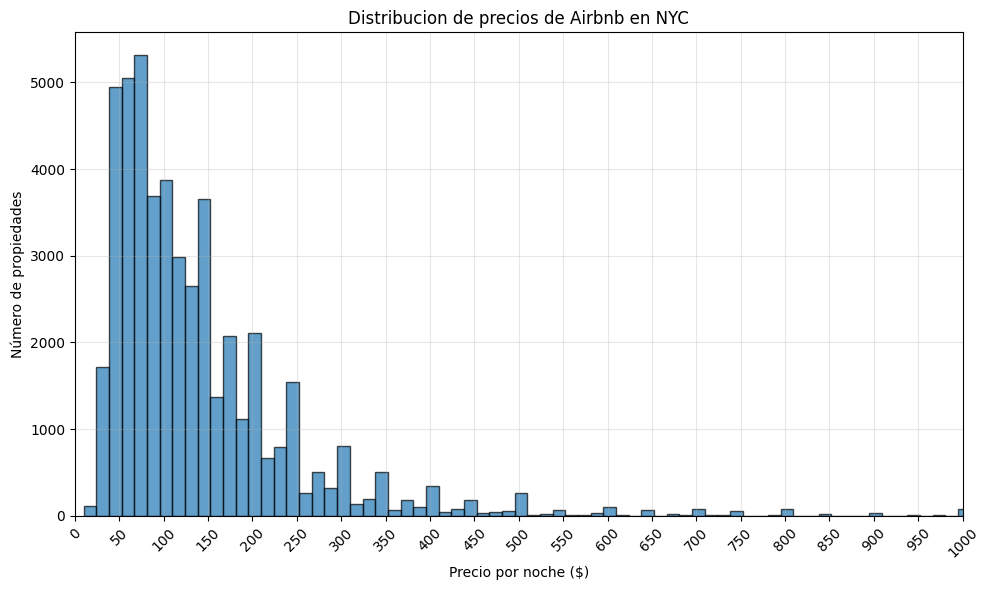

In [92]:
# HISTOGRAMA DE PRECIOS
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=700, edgecolor='black', alpha=0.7)
plt.title('Distribucion de precios de Airbnb en NYC')
plt.xlabel('Precio por noche ($)')
plt.ylabel('Número de propiedades')
plt.xticks(range(0, 1001, 50), rotation=45)
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

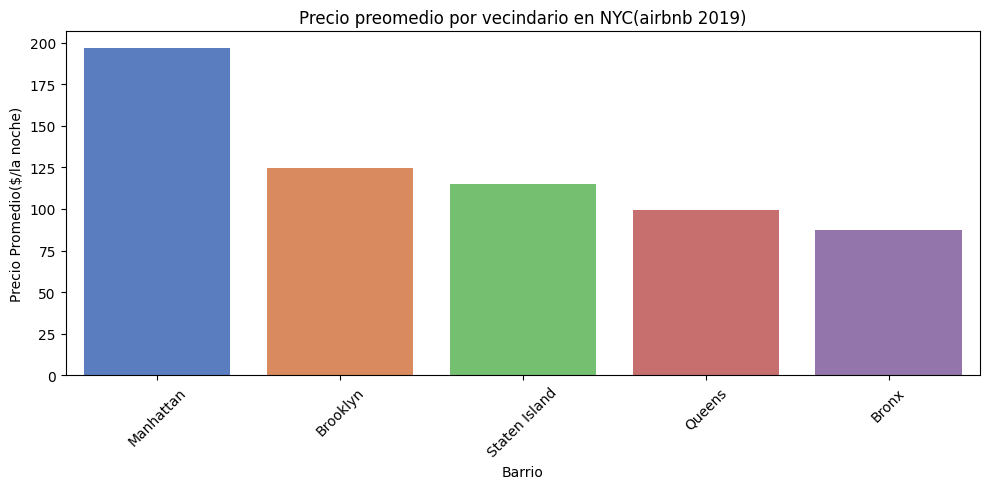

In [93]:
avg_price = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price.index, y=avg_price.values, hue=avg_price.index, palette="muted", legend=False)


plt.xticks(rotation=45)
plt.title("Precio preomedio por vecindario en NYC(airbnb 2019)")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio($/la noche)")
plt.tight_layout()
plt.show()

(0.0, 500.0)

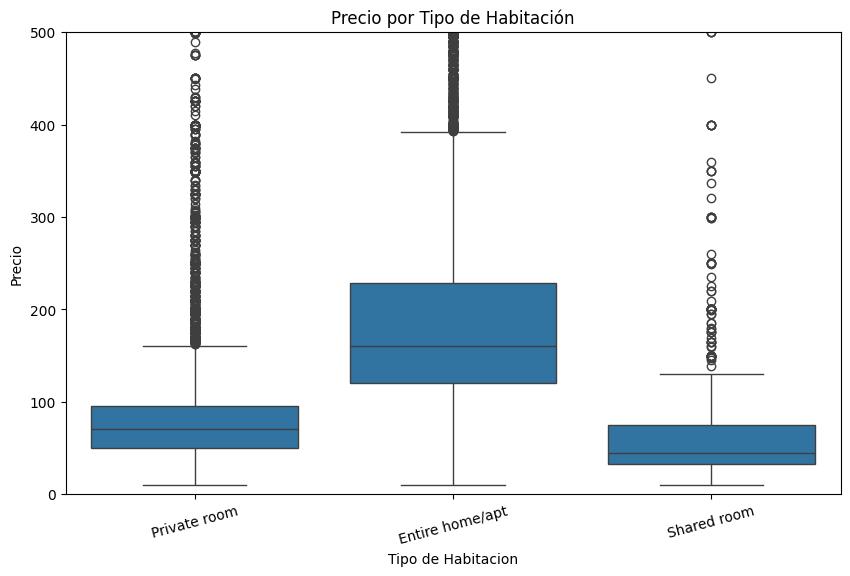

In [ ]:
#PRECIO POR TIPO DE HABITACIÓN
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Precio por Tipo de Habitación')
plt.xlabel("Tipo de Habitacion")
plt.ylabel("Precio")
plt.xticks(rotation=15)
plt.ylim(0, 500)

In [94]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


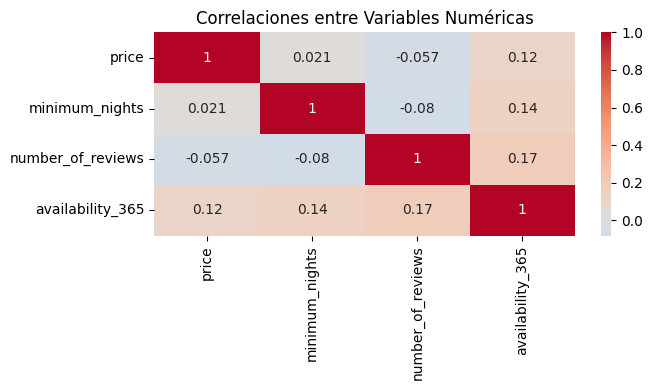

In [ ]:
df_filtrado = df[df['price'] < 1000] # Borrar precios de mas de 1000

# MAPA DE CALOR DE CORRELACIONES
plt.figure(figsize=(7, 4))
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.heatmap(df_filtrado[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

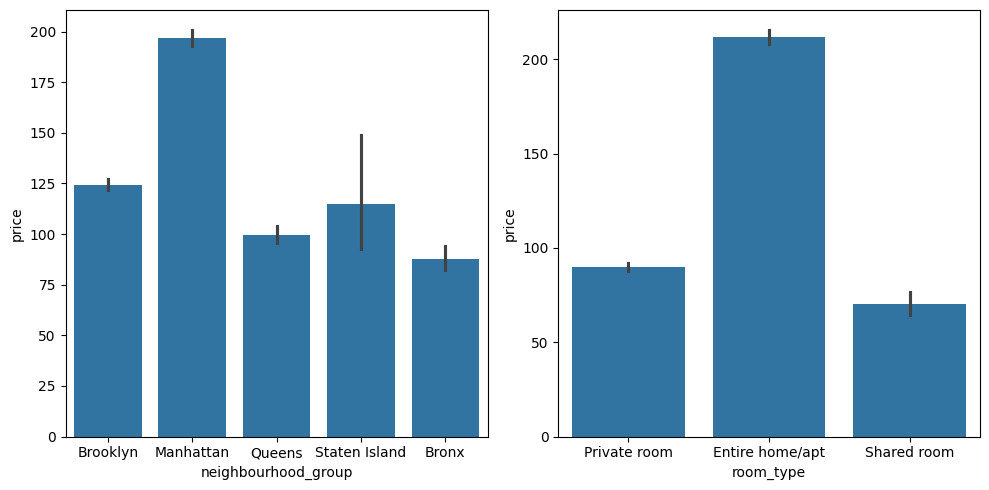

In [ ]:
#Precio promedio por Barrios y por tipos de alojamientos 
fig, axis = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y = "price")
sns.barplot(ax = axis[1], data = df, x = "room_type", y = "price")
plt.tight_layout()
plt.show()

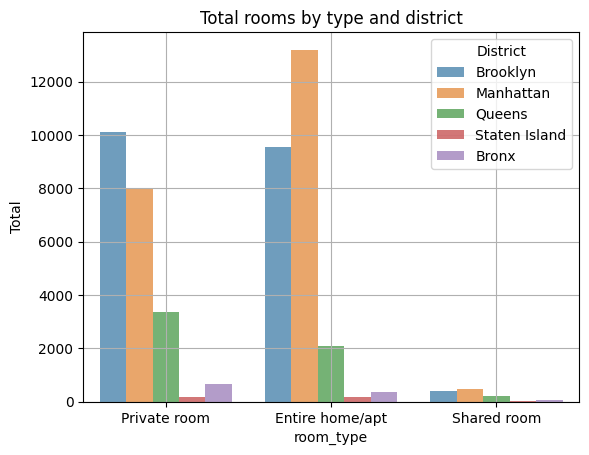

In [ ]:
#total rents by room and district

sns.countplot(df, x = 'room_type', hue='neighbourhood_group', alpha = 0.7)
plt.title('Total rooms by type and district')
plt.ylabel('Total')
plt.legend(title = 'District')
plt.grid()
plt.show()

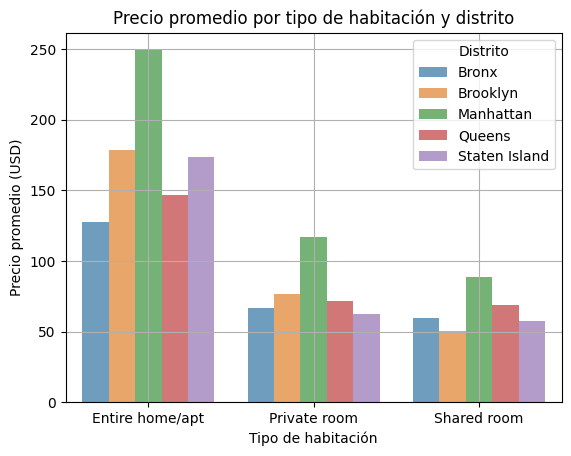

In [ ]:

# Agrupados por tipo de habitación y distrito / Precio promedio
avg_price = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()

# Crear el gráfico
sns.barplot(data=avg_price, x='room_type', y='price', hue='neighbourhood_group', alpha=0.7)

plt.title('Precio promedio por tipo de habitación y distrito')
plt.ylabel('Precio promedio (USD)')
plt.xlabel('Tipo de habitación')
plt.legend(title='Distrito')
plt.grid(True)
plt.show()


### Conclusión
Aunque las correlaciones numéricas no revelaron patrones fuertes, las visualizaciones y transformaciones realizadas aportaron claridad sobre la distribución de precios y la oferta por zona.

El precio promedio varía considerablemente según el tipo de habitación y el distrito. En general, los alojamientos completos presentan precios más elevados que las habitaciones privadas o compartidas, lo cual refleja diferencias en comodidad, privacidad y capacidad.